## Dataset Walkthrough

The dataset is a standard dataframe importabale through pandas.

In [855]:
import numpy as np
import pandas as pd
from functools import partial
import math
import csv

import sklearn # sklearn
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE # class imbalance

from xgboost import XGBClassifier # xgboost

import matplotlib.pyplot as plt # plotting
import seaborn as sns

In [856]:
df_train = pd.read_csv("af2_dataset_training_labeled.csv.gz", index_col=0)
df_train

,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,...,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry,entry_index,y_Ligand
0,M,False,False,False,False,False,False,False,False,False,...,0,0.0,47,-0.0,-26.499001,-4.742000,-35.189999,GEMI5_HUMAN,0,False
1,G,False,False,False,False,False,True,False,False,False,...,0,0.0,0,0.0,-25.158001,-1.342000,-34.104000,GEMI5_HUMAN,1,False
2,Q,False,False,False,False,False,False,False,False,False,...,1,-0.0,-1,-0.0,-21.926001,-1.641000,-32.175999,GEMI5_HUMAN,2,False
3,E,False,False,False,True,False,False,False,False,False,...,706,-0.1,705,-0.0,-22.073999,0.654000,-29.171000,GEMI5_HUMAN,3,False
4,P,False,False,False,False,False,False,False,False,False,...,0,0.0,705,-0.2,-19.783001,2.670000,-26.858999,GEMI5_HUMAN,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,S,False,False,False,False,False,False,False,False,False,...,-3,-0.1,2,-0.4,-19.742001,20.796000,-12.319000,AOC3_HUMAN,755,False
756,H,False,False,False,False,False,False,True,False,False,...,-358,-0.1,-330,-0.1,-16.299000,19.153999,-12.640000,AOC3_HUMAN,756,False
757,G,False,False,False,False,False,True,False,False,False,...,-360,-0.2,-1,-0.1,-13.404000,19.502001,-10.121000,AOC3_HUMAN,757,False
758,G,False,False,False,False,False,True,False,False,False,...,0,0.0,0,0.0,-10.986000,20.320000,-13.016000,AOC3_HUMAN,758,False


In [857]:
df_train.dtypes

annotation_sequence     object
feat_A                    bool
feat_C                    bool
feat_D                    bool
feat_E                    bool
feat_F                    bool
feat_G                    bool
feat_H                    bool
feat_I                    bool
feat_K                    bool
feat_L                    bool
feat_M                    bool
feat_N                    bool
feat_P                    bool
feat_Q                    bool
feat_R                    bool
feat_S                    bool
feat_T                    bool
feat_V                    bool
feat_W                    bool
feat_Y                    bool
annotation_atomrec      object
feat_PHI               float64
feat_PSI               float64
feat_TAU               float64
feat_THETA             float64
feat_BBSASA            float64
feat_SCSASA            float64
feat_pLDDT             float64
feat_DSSP_H               bool
feat_DSSP_B               bool
feat_DSSP_E               bool
feat_DSS

In [858]:
df_train = pd.get_dummies(df_train,columns=["annotation_sequence"], prefix='Sequence')
df_train = pd.get_dummies(df_train,columns=["annotation_atomrec"], prefix='atomrec')
df_train

,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,feat_L,...,atomrec_M,atomrec_N,atomrec_P,atomrec_Q,atomrec_R,atomrec_S,atomrec_T,atomrec_V,atomrec_W,atomrec_Y
0,False,False,False,False,False,False,False,False,False,False,...,1,0,0,0,0,0,0,0,0,0
1,False,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,False,False,False,False,False,False,False,False,False,False,...,0,0,0,1,0,0,0,0,0,0
3,False,False,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,False,False,False,False,False,False,False,False,False,False,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0
756,False,False,False,False,False,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
757,False,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
758,False,False,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [859]:
df_train['y_Ligand'].value_counts()

False    479912
True      17254
Name: y_Ligand, dtype: int64

In [860]:
df_train.drop(columns=['entry'],inplace=True)

In [861]:
df_train = df_train * 1
df_train.dtypes

feat_A       int64
feat_C       int64
feat_D       int64
feat_E       int64
feat_F       int64
             ...  
atomrec_S    uint8
atomrec_T    uint8
atomrec_V    uint8
atomrec_W    uint8
atomrec_Y    uint8
Length: 87, dtype: object

In [862]:
# df_train.corr()

All columns with the `feat_*` prefix are boolean, integer, or float features that describe the residue itself.  These can be used for training a model.  Domain knowledge of these values should not be necessary to participate in the challenge, but we've provided brief descriptions below for anyone who may be interested:

* `feat_[letter]` are one-hot encoded boolean values for each of the 20 possible amino acids.
* `feat_PHI`, `feat_PSI`, `feat_TAU`, `feat_THETA` describe various protein chain bonding angles, computed with [Biopython](https://biopython.org/docs/1.75/api/Bio.PDB.Polypeptide.html).
* `feat_BBSASA`, `feat_SCSASA` describe the solvent accessible surface area, calculated using [FreeSASA](https://freesasa.github.io/).
* `feat_pLDDT` is an AlphaFold2 residue-level prediction confidence value.
* `feat_DSSP_[letter]` are secondary structure assignments by [DSSP].(https://en.wikipedia.org/wiki/DSSP_(algorithm))
* `feat_DSSP_[number]` are other backbone structural features describing backbone hydrogen. bonding networks, also assigned by [DSSP](https://en.wikipedia.org/wiki/DSSP_(algorithm)).

Column `y_Ligand` indicates if the residue (row) belongs to a known binding site or not.  This column is the classification objective for our challenge. 

The remaining columns describe other elements of the protein structure for reference or troubleshooting purposes.  Participants may use this information to to engineer new features/representations in their models if they so choose. These include:
* `annotation_sequence` and `annotation_atomrec`: Residue amino acid in character format.
* `entry`: Protein name, can be looked up on Uniprot for more information about the protein.  Each unique entry is one unique protein structure in this dataset.
* `coord_X`, `coord_Y`, `coord_Z`: XYZ coordinates of the residue in the respective protein structure.  For example, all residues for protein 'QCR1_HUMAN' belong to the same coordinate space, but the coordinate space would shared between two residues (rows) with `entry` values of 'QCR1_HUMAN' and 'PPM1A_HUMAN'.
* `entry_index`: The order of the amino acid within the protein sequence.  As with coordinates, these relationships are only meaningful for rows (residues) that share the same `entry` value.  For example, within QCR1_HUMAN two residues (rows) with `entry_index` 5 and 6 are adjacent (connected) neighbors.

The test dataset has the same format, but is otherwise missing the `y_Ligand` column. 

### Let's try fitting a model to this dataset
- We will use XGBoost to demonstrate, but there are many more models out there + other Neural Networks based approaches! Go Explore!
- The train set is further split into train and test (usually we call this validation set) to evaluate before letting the model predict on the actual test set
- For simplicity, we have also dropped all categorical columns (columns with string values, etc). These can be useful, so try to use it in your training!

In [863]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(["y_Ligand"], axis=1), df_train["y_Ligand"], test_size=0.2, random_state=42)

In [864]:

X_train, y_train = SMOTE(sampling_strategy=1/3).fit_resample(X_train, y_train)

In [865]:
xgb = XGBClassifier(
        learning_rate =0.01,
        n_estimators=2000,
        max_depth=11,
        min_child_weight=2,
        gamma=0.4,
        subsample=0.9,
        colsample_bytree=0.7,
        reg_alpha = 2.5e-6,
        objective= 'binary:logistic',
        tree_method='gpu_hist',
        scale_pos_weight=1,
        seed=27)

In [866]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
    "learning_rate": [0.01,0.05,0.10,0.15,0.20],
    'n_estimators':[1500,1750, 2000, 2250,2500]
}
gsearch1 = GridSearchCV(estimator = xgb, param_grid = param_test1, scoring='roc_auc',n_jobs=6, cv=5)
gsearch1.fit(X_test,y_test)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.7,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0.4, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01, ma...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=11,
                                     max_leaves=None, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=2000, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=6,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'n_estimators': [1500, 1750, 2000, 2250, 2500]},
             scoring='roc_auc')

In [867]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([56.54248724, 63.60927844, 72.80425825, 80.50749812, 84.63293133,
         28.80269904, 30.70588169, 32.02412033, 33.81794333, 34.95861592,
         19.44948797, 21.71803904, 23.45708823, 25.13902388, 26.79344096,
         16.79315472, 18.83838582, 20.59753809, 22.26407104, 23.84615874,
         15.3343667 , 17.21929116, 18.94820476, 20.67220788, 17.08747754]),
  'std_fit_time': array([0.05570435, 3.02833314, 0.93497571, 0.29766215, 3.06975301,
         0.53622628, 0.32886744, 0.43318158, 0.34228766, 0.85329472,
         0.3789967 , 0.10960002, 0.11749282, 0.05258473, 0.22974837,
         0.36162793, 0.11834389, 0.20009897, 0.17408662, 0.09553881,
         0.20060912, 0.11578413, 0.10571524, 0.08698036, 3.66726005]),
  'mean_score_time': array([0.69140048, 0.7383523 , 0.72097087, 0.75029597, 0.82526755,
         0.22952733, 0.22910709, 0.24047728, 0.23652964, 0.24784899,
         0.14336014, 0.13815231, 0.14140882, 0.14429832, 0.144557  ,
         0.10820923, 0

In [868]:
xgb.fit(X_train, y_train, eval_metric='auc')

/home/ai/mambaforge/envs/keras/lib/python3.10/site-packages/xgboost/sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.4, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=11, max_leaves=0, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=2000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=27, ...)

In [869]:
from sklearn import metrics
y_test_res = xgb.predict_proba(X_test)[:, 1]
y_test_pred = y_test_res > 0.5

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
auc_roc = metrics.auc(fpr, tpr)

precision, recall, _ = metrics.precision_recall_curve(y_test, y_test_pred)
auc_pr = metrics.auc(recall, precision)

print(f"ROC-AUC: {auc_roc} \n PR-AUC {auc_pr}")

ROC-AUC: 0.6076330645375919 
 PR-AUC 0.5054638521561816


In [870]:
auc_rocs = []
auc_prs = []
means = []
for i in range(100):
    print(i)
    y_test_pred = y_test_res > (i/100)

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
    auc_roc = metrics.auc(fpr, tpr)

    precision, recall, _ = metrics.precision_recall_curve(y_test, y_test_pred)
    auc_pr = metrics.auc(recall, precision)

    mean = (auc_pr + auc_roc) / 2

    print(f"ROC-AUC: {auc_roc} \n PR-AUC {auc_pr} \n Mean: {mean}")
    auc_rocs.append(auc_roc)
    auc_prs.append(auc_pr)
    means.append(mean)

0
ROC-AUC: 0.5 
 PR-AUC 0.5170766538608524 
 Mean: 0.5085383269304262
1
ROC-AUC: 0.7213483431457772 
 PR-AUC 0.517113238942525 
 Mean: 0.6192307910441511
2
ROC-AUC: 0.7682821386881827 
 PR-AUC 0.49578268964170735 
 Mean: 0.632032414164945
3
ROC-AUC: 0.7891924393100092 
 PR-AUC 0.4795077897807039 
 Mean: 0.6343501145453565
4
ROC-AUC: 0.7924915941081527 
 PR-AUC 0.46174960324911885 
 Mean: 0.6271205986786358
5
ROC-AUC: 0.7882010245944314 
 PR-AUC 0.4455317161474547 
 Mean: 0.616866370370943
6
ROC-AUC: 0.781178802383656 
 PR-AUC 0.4319152981944421 
 Mean: 0.6065470502890491
7
ROC-AUC: 0.7782657181414571 
 PR-AUC 0.4268956929807315 
 Mean: 0.6025807055610943
8
ROC-AUC: 0.7739667106642687 
 PR-AUC 0.42320019439326506 
 Mean: 0.5985834525287669
9
ROC-AUC: 0.7679302645735709 
 PR-AUC 0.41948205290125595 
 Mean: 0.5937061587374135
10
ROC-AUC: 0.7630564576286315 
 PR-AUC 0.41847197388719093 
 Mean: 0.5907642157579112
11
ROC-AUC: 0.7587461668282023 
 PR-AUC 0.41988718534098074 
 Mean: 0.58931667

<function matplotlib.pyplot.show(close=None, block=None)>

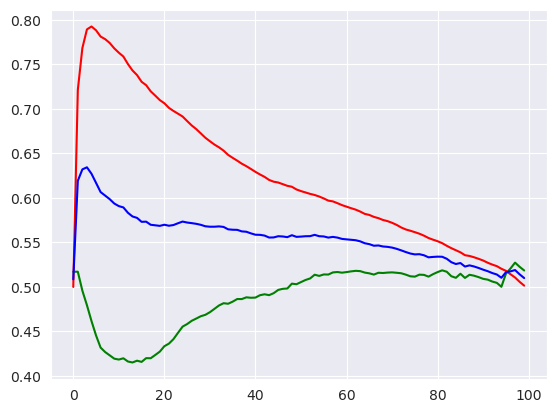

In [871]:
import matplotlib.pyplot as plt
plt.plot(list(range(100)),auc_rocs,'r')
plt.plot(list(range(100)),auc_prs, 'g')
plt.plot(list(range(100)),means, 'b')
plt.show

## Submission Instructions

- Run inference on the test set and save the inference results as a csv file, the file should look like this
```
id,Predicted
0,True
1,False
2,True
3,False
....
```
- Submit the csv on Kaggle
- Automatic evaluation will be done with ROC-AUC
- Top submissions will be further evaluated by the mean of ROC-AUC and PR-AUC

In [872]:
df_test = pd.read_csv("af2_dataset_testset_unlabeled.csv.gz", index_col=0)
df_test

,annotation_sequence,feat_A,feat_C,feat_D,feat_E,feat_F,feat_G,feat_H,feat_I,feat_K,...,feat_DSSP_9,feat_DSSP_10,feat_DSSP_11,feat_DSSP_12,feat_DSSP_13,coord_X,coord_Y,coord_Z,entry,entry_index
0,M,False,False,False,False,False,False,False,False,False,...,0.0,0,0.0,0,0.0,33.116001,37.023998,38.417000,QCR1_HUMAN,0
1,A,True,False,False,False,False,False,False,False,False,...,-0.0,2,-0.0,0,0.0,35.849998,34.841000,40.185001,QCR1_HUMAN,1
2,A,True,False,False,False,False,False,False,False,False,...,-0.1,0,0.0,2,-0.0,37.087002,31.719999,40.547001,QCR1_HUMAN,2
3,S,False,False,False,False,False,False,False,False,False,...,-0.1,0,0.0,-2,-0.0,38.095001,28.951000,42.321999,QCR1_HUMAN,3
4,V,False,False,False,False,False,False,False,False,False,...,0.0,0,0.0,0,0.0,41.435001,27.417000,43.703999,QCR1_HUMAN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,L,False,False,False,False,False,False,False,False,False,...,-0.5,-3,-0.3,-3,-0.0,47.813999,7.569000,-27.368999,PDE7A_HUMAN,474
475,P,False,False,False,False,False,False,False,False,False,...,-0.1,0,0.0,-3,-0.0,50.228001,8.068000,-30.333000,PDE7A_HUMAN,475
476,Q,False,False,False,False,False,False,False,False,False,...,-0.0,0,0.0,0,0.0,51.507999,4.896000,-31.959999,PDE7A_HUMAN,476
477,E,False,False,False,True,False,False,False,False,False,...,0.0,0,0.0,0,0.0,54.845001,6.372000,-33.125000,PDE7A_HUMAN,477


In [873]:
y_test_submission = xgb.predict(df_test[without_categorical_columns])

NameError: name 'without_categorical_columns' is not defined

In [ ]:
s = pd.Series(y_test_submission).astype(bool)
s.name = "Predicted"
s.to_csv("submission.csv")